In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [11]:
np.random.seed(123)

# Generate synthetic dataset
features, targets = make_classification(
    n_samples=1200,
    n_features=25,
    n_classes=5,
    n_clusters_per_class=1,
    n_informative=20,
    random_state=123
)

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.25, random_state=123)

In [12]:
def encode_one_hot(labels, num_classes):
    return np.eye(num_classes)[labels]

Y_train_encoded = encode_one_hot(Y_train, num_classes=5)
Y_test_encoded = encode_one_hot(Y_test, num_classes=5)


In [14]:
def sigmoid(x, derivative=False):
    if derivative:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [15]:
def softmax(x):
    exp_vals = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_vals / np.sum(exp_vals, axis=1, keepdims=True)

In [16]:
class SimpleNN:
    def __init__(self):
        self.input_size = 25
        self.hidden_1_size = 40
        self.hidden_2_size = 20
        self.hidden_3_size = 10
        self.output_size = 5
        self.lr = 0.005

        # Initialize weights
        self.W1 = np.random.randn(self.input_size, self.hidden_1_size) * 0.01
        self.W2 = np.random.randn(self.hidden_1_size, self.hidden_2_size) * 0.01
        self.W3 = np.random.randn(self.hidden_2_size, self.hidden_3_size) * 0.01
        self.W4 = np.random.randn(self.hidden_3_size, self.output_size) * 0.01

    def forward(self, inputs):
        self.Z1 = np.dot(inputs, self.W1)
        self.A1 = sigmoid(self.Z1)

        self.Z2 = np.dot(self.A1, self.W2)
        self.A2 = sigmoid(self.Z2)

        self.Z3 = np.dot(self.A2, self.W3)
        self.A3 = sigmoid(self.Z3)

        self.Z4 = np.dot(self.A3, self.W4)
        self.outputs = softmax(self.Z4)

        return self.outputs

    def backward(self, inputs, targets, predictions):
        error = predictions - targets

        dW4 = np.dot(self.A3.T, error)
        dW3 = np.dot(self.A2.T, np.dot(error, self.W4.T) * sigmoid(self.A3, derivative=True))
        dW2 = np.dot(self.A1.T, np.dot(np.dot(error, self.W4.T) * sigmoid(self.A3, derivative=True), self.W3.T) * sigmoid(self.A2, derivative=True))
        dW1 = np.dot(inputs.T, np.dot(np.dot(np.dot(error, self.W4.T) * sigmoid(self.A3, derivative=True), self.W3.T) * sigmoid(self.A2, derivative=True), self.W2.T) * sigmoid(self.A1, derivative=True))

        # Update weights
        self.W4 -= self.lr * dW4
        self.W3 -= self.lr * dW3
        self.W2 -= self.lr * dW2
        self.W1 -= self.lr * dW1

    def train(self, inputs, targets, epochs):
        loss_history = []
        for epoch in range(epochs):
            predictions = self.forward(inputs)
            self.backward(inputs, targets, predictions)


            loss = -np.mean(np.sum(targets * np.log(predictions + 1e-9), axis=1))
            loss_history.append(loss)

            if epoch % 500 == 0:
                print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}")

        return loss_history

In [18]:
model = SimpleNN()
num_epochs = 8000
losses = model.train(X_train, Y_train_encoded, num_epochs)

Epoch 0/8000 - Loss: 1.6092
Epoch 500/8000 - Loss: 1.6088
Epoch 1000/8000 - Loss: 1.6073
Epoch 1500/8000 - Loss: 0.1982
Epoch 2000/8000 - Loss: 0.0232
Epoch 2500/8000 - Loss: 0.0083
Epoch 3000/8000 - Loss: 0.0028
Epoch 3500/8000 - Loss: 0.0016
Epoch 4000/8000 - Loss: 0.0011
Epoch 4500/8000 - Loss: 0.0009
Epoch 5000/8000 - Loss: 0.0007
Epoch 5500/8000 - Loss: 0.0006
Epoch 6000/8000 - Loss: 0.0005
Epoch 6500/8000 - Loss: 0.0004
Epoch 7000/8000 - Loss: 0.0004
Epoch 7500/8000 - Loss: 0.0003


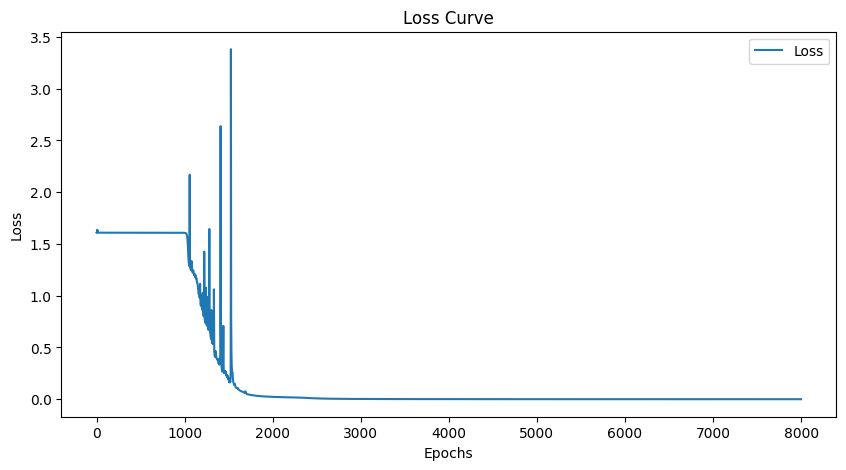

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(losses, label="Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [20]:
test_predictions = np.argmax(model.forward(X_test), axis=1)
accuracy = np.mean(test_predictions == Y_test)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")


Accuracy on test data: 75.00%


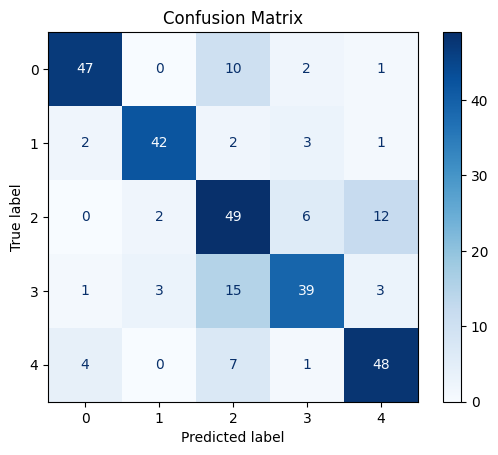

In [21]:
cm = confusion_matrix(Y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [22]:
print("Sample Predictions:")
for i in range(3):  # Show fewer samples
    prob = model.forward([X_test[i]])[0]
    print(f"Input: {X_test[i]}, Predicted Class: {np.argmax(prob)}, Actual: {Y_test[i]}")

Sample Predictions:
Input: [ 3.80805504  1.36245102 -4.52283442 -5.00085216 -1.65893739  1.59301355
  4.90738489 -0.59708672 -1.08238648  3.64237915  6.22804869  0.75552109
  0.44826054  4.49081192 -1.16131545 -1.06811348  5.54372664  2.09977014
  0.18877711  1.43902859 -4.06855674  0.26439305 -3.21353811  2.00208473
 -2.51589309], Predicted Class: 0, Actual: 0
Input: [ 2.40622537  2.42922723 -3.32331478 -0.25751426 -0.73224793  0.8057142
  1.82726988  0.43933672 -4.42344073 -4.1382828   1.91127462  2.94920094
 -0.79035746  1.00528286  0.03851933  0.20910373  1.92392351 -0.62444005
 -2.68240863  1.78585157 -5.03291441  2.40680965 -0.74331362 -0.50014949
  0.11373984], Predicted Class: 2, Actual: 2
Input: [-1.33397974 -0.76598435 -0.07585414  1.29523835  7.1657965   1.0554436
 -2.92042227 -0.70253227  9.16643647  2.21928976 -0.11921405  2.94182444
  1.84736977  0.62082948  4.21481833  1.54366742  1.63183991 -0.53405266
  2.12805583  2.23494937  0.38884604 -2.25205617 -4.21826607 -0.2874